# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv("D:\\data.csv", encoding= 'unicode_escape')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom



# Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe().round(1)

,Quantity,UnitPrice,CustomerID
count,541909.0,541909.0,406829.0
mean,9.6,4.6,15287.7
std,218.1,96.8,1713.6
min,-80995.0,-11062.1,12346.0
25%,1.0,1.2,13953.0
50%,3.0,2.1,15152.0
75%,10.0,4.1,16791.0
max,80995.0,38970.0,18287.0


In [6]:
df.shape

(541909, 8)

# Data Cleansing

In [7]:
df.duplicated().sum()

5268

In [8]:
df[df.duplicated()].sort_values(by = 'InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
620,536412,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
411644,C572226,85066,CREAM SWEETHEART MINI CHEST,-1,10/21/2011 13:58,12.75,15321.0,United Kingdom
436251,C574095,22326,ROUND SNACK BOXES SET OF4 WOODLAND,-1,11/3/2011 9:54,2.95,12674.0,France
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,11/4/2011 13:25,2.95,15110.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom


In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
for col in df.columns:
    pct = df[col].isnull().mean()
    print(f'{col} - {pct :.1%}')

InvoiceNo - 0.0%
StockCode - 0.0%
Description - 0.3%
Quantity - 0.0%
InvoiceDate - 0.0%
UnitPrice - 0.0%
CustomerID - 25.2%
Country - 0.0%


In [12]:
copy = df.copy()

In [13]:
df['Description'] = df['Description'].fillna('Unknown')
df['CustomerID'] = df['CustomerID'].fillna(0)

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [17]:
df['Time'] = df['InvoiceDate'].dt.time
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Total'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010,December,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12:50:00,2011,December,Friday,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12:50:00,2011,December,Friday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,2011,December,Friday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,2011,December,Friday,16.60


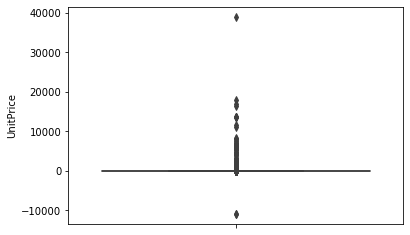

In [18]:
sns.boxplot(y = df['UnitPrice'])

In [19]:
df[df['UnitPrice'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom,14:51:00,2011,August,Friday,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom,14:52:00,2011,August,Friday,-11062.06


In [20]:
mask = df['Description'].str.contains('debt',case = False)
df = df[~mask]

In [21]:
df = df[df['UnitPrice']>0]

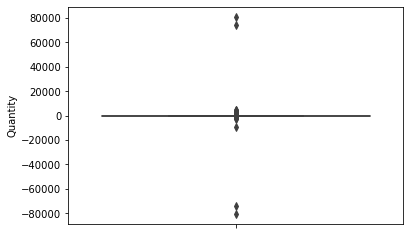

In [22]:
sns.boxplot(y = df['Quantity'])

In [23]:
df[df['Quantity'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,2010,December,Wednesday,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,2010,December,Wednesday,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,2010,December,Wednesday,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,2010,December,Wednesday,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,2010,December,Wednesday,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,2011,December,Friday,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,10:28:00,2011,December,Friday,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,2011,December,Friday,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,2011,December,Friday,-1.25


In [24]:
cancelled_purchases = df[df['Quantity'] <0]

In [25]:
df = df[df['Quantity'] >0]
df['Quantity'].min()

1

In [26]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total
279485,561325,22979,PANTRY WASHING UP BRUSH,1,2011-07-26 13:46:00,1.45,17596.0,United Kingdom,13:46:00,2011,July,Tuesday,1.45
476426,577016,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,4,2011-11-17 12:21:00,9.95,17095.0,United Kingdom,12:21:00,2011,November,Thursday,39.80
238614,557949,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-06-23 17:20:00,2.95,15530.0,United Kingdom,17:20:00,2011,June,Thursday,35.40
417278,572652,23506,MINI PLAYING CARDS SPACEBOY,20,2011-10-25 12:11:00,0.42,15805.0,United Kingdom,12:11:00,2011,October,Tuesday,8.40
371567,569221,15056BL,EDWARDIAN PARASOL BLACK,2,2011-10-02 13:44:00,5.95,14970.0,United Kingdom,13:44:00,2011,October,Sunday,11.90
297370,562939,20682,RED RETROSPOT CHILDRENS UMBRELLA,12,2011-08-11 08:37:00,3.25,15498.0,United Kingdom,08:37:00,2011,August,Thursday,39.00
127985,547249,21928,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,2,2011-03-22 09:27:00,4.13,0.0,United Kingdom,09:27:00,2011,March,Tuesday,8.26
488234,577804,23570,TRADITIONAL PICK UP STICKS GAME,1,2011-11-21 17:33:00,1.25,17432.0,United Kingdom,17:33:00,2011,November,Monday,1.25
146435,548987,21787,RAIN PONCHO RETROSPOT,10,2011-04-05 12:50:00,0.85,14535.0,United Kingdom,12:50:00,2011,April,Tuesday,8.50
535740,581217,22916,HERB MARKER THYME,3,2011-12-08 09:20:00,1.63,0.0,United Kingdom,09:20:00,2011,December,Thursday,4.89


# Analysis

1) What was the best month for sales?

In [27]:
sales_2010 = df[df['Year']== 2010].groupby('Month').sum()[['Total']].reset_index()
sales_2011 = df[df['Year']== 2011].groupby('Month').sum()[['Total']].reset_index()


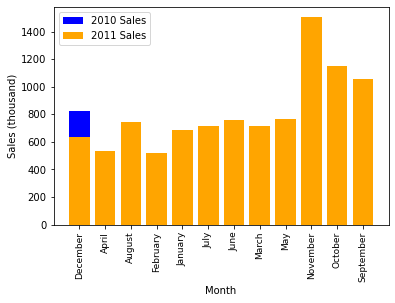

In [28]:
plt.bar(sales_2010["Month"],sales_2010['Total']/1000, label='2010 Sales', color='blue')
plt.bar(sales_2011["Month"],sales_2011['Total']/1000, label='2011 Sales', color='orange')
plt.xticks(rotation = 'vertical',size = 9)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.legend()
plt.show()

Based on the analysis, it was found that the month with the highest total sales in 2011 was November, followed by October and
September, while April and February had the least total sales. As for the year 2010, data was only available for December

2) What product sold the most ?

In [29]:
soldmost = df.groupby(['Description'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending = False).head(10)
soldmost

,Description,Quantity
2386,"PAPER CRAFT , LITTLE BIRDIE",80995
2051,MEDIUM CERAMIC TOP STORAGE JAR,78033
3933,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1815,JUMBO BAG RED RETROSPOT,48371
3843,WHITE HANGING HEART T-LIGHT HOLDER,37872
2680,POPCORN HOLDER,36749
2336,PACK OF 72 RETROSPOT CAKE CASES,36396
227,ASSORTED COLOUR BIRD ORNAMENT,36362
2740,RABBIT NIGHT LIGHT,30739
2106,MINI PAINT SET VINTAGE,26633


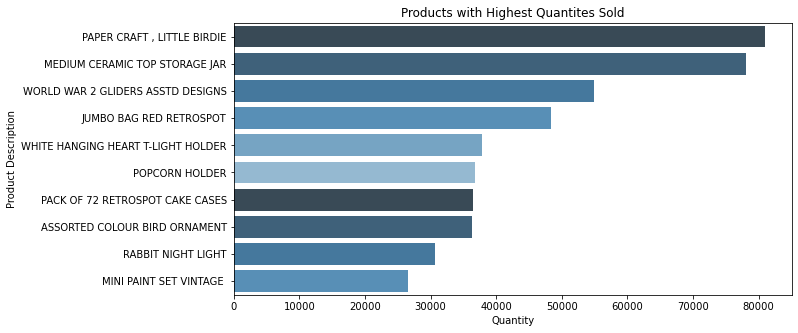

In [30]:
#Choosing Palette and reverse it
Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (10,5))
#Visualizing
ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = soldmost, palette = Palette)
#Setting Title
plt.title('Products with Highest Quantites Sold')
plt.ylabel('Product Description')
plt.show()

3) Which countries have more customers?


In [31]:
countrysales = df['Country'].value_counts().reset_index().head(10)
countrysales.columns=['Country','Count']
countrysales

,Country,Count
0,United Kingdom,479984
1,Germany,9025
2,France,8392
3,EIRE,7879
4,Spain,2479
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1958
8,Portugal,1492
9,Australia,1181


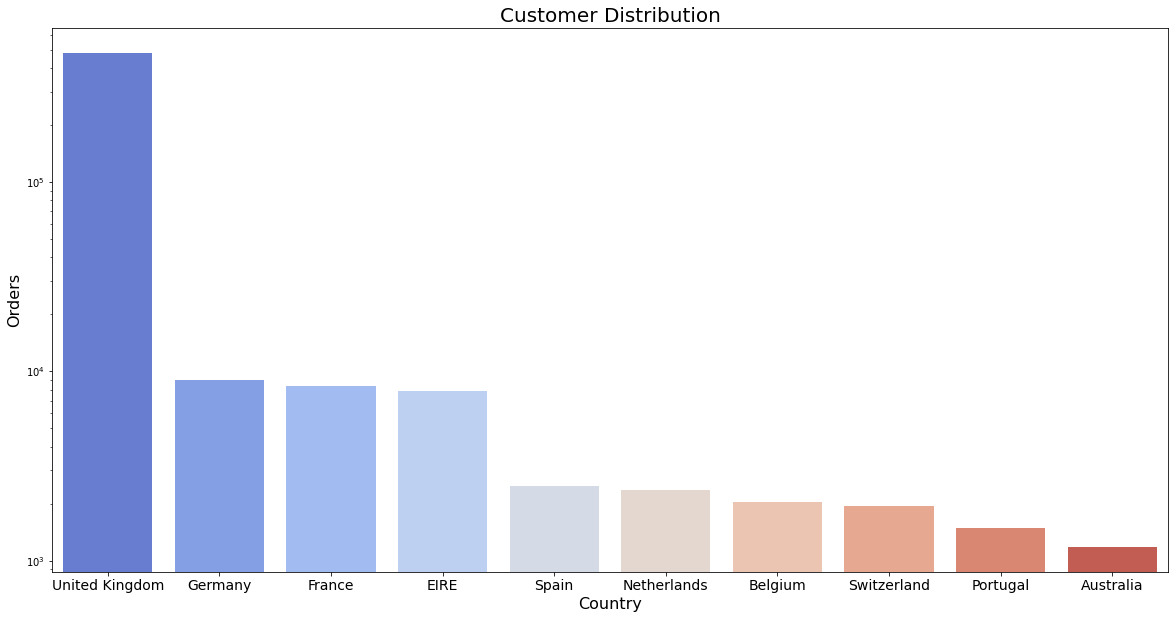

In [32]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Country',y='Count',data=countrysales,palette = 'coolwarm')
plt.title('Customer Distribution',fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.yscale('log')
plt.xticks(fontsize = 14)
plt.show()

4) which day has more number of sales?


In [33]:
salesday = df['Day'].value_counts().reset_index()
salesday.columns =['Day','sales']
salesday

,Day,sales
0,Thursday,100213
1,Tuesday,98726
2,Monday,92466
3,Wednesday,91467
4,Friday,79666
5,Sunday,62339


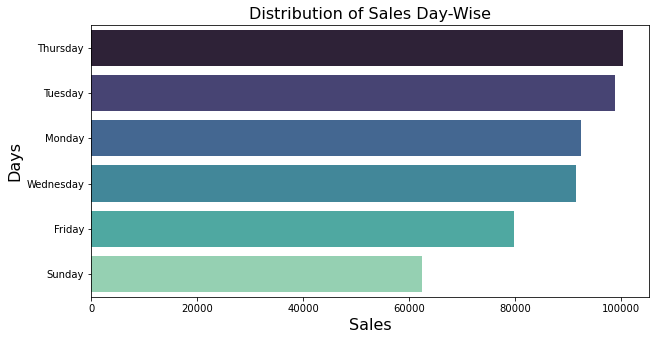

In [34]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'sales',y = 'Day', data = salesday,palette = 'mako')
plt.title('Distribution of Sales Day-Wise',fontsize = 16)
plt.ylabel('Days',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()


# RFM Analysis

In [35]:
#Ignoring Cancel orders
copy = copy[~copy['InvoiceNo'].str.contains('C')]

In [36]:
#Dropping Null values in Customer ID column
copy = copy.dropna(subset=['CustomerID'])
copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [37]:
#Make Checkoutprice Column
copy['total'] = copy['UnitPrice'] * copy['Quantity']
#Ignoring Debts
copy =copy[copy['UnitPrice']>0]

In [38]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
 8   total        392692 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.0+ MB


In [39]:
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'])
copy['CustomerID'] = copy['CustomerID'].astype('int64')
copy['total'] = copy['total'].astype('int64')

In [40]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
 8   total        392692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 30.0+ MB


In [41]:
copy = copy[copy['total'] >0]
copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16


In [42]:
import datetime as dt
today_date = dt.datetime(2011,12,12)
today_date

datetime.datetime(2011, 12, 12, 0, 0)

In [43]:
#Set our data to rfm Analysis
rfm = copy.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (today_date - date.max()).days ,
'InvoiceNo' : lambda num :num.nunique() ,
'total' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm

,InvoiceDate,InvoiceNo,total
CustomerID,,,
12346,327,1,77183
12347,4,7,4251
12348,77,4,1786
12349,20,1,1718
12350,312,1,329
...,...,...,...
18280,279,1,175
18281,182,1,78
18282,9,2,171


In [44]:
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']

In [45]:
rfm.sample(10)

,Recency,Frequency,Monetary
CustomerID,,,
15320,46,1,246
17912,312,5,287
14236,82,2,485
12528,11,6,1892
13999,12,12,3799
17436,3,2,212
14765,31,3,231
12527,83,3,342
17069,30,9,2636


In [46]:
rfm.describe().round(2)

,Recency,Frequency,Monetary
count,4338.00,4338.00,4338.00
mean,94.06,4.27,2004.23
std,100.01,7.69,8944.10
min,2.00,1.00,3.00
25%,19.00,1.00,296.00
50%,52.00,2.00,639.50
75%,143.75,5.00,1610.00
max,375.00,207.00,279510.00


In [47]:
#Set Recency Score
rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])
#Set Frequency Score
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])
#Set Monatry Score
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])


In [48]:
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) +
rfm['Monetary_Score'].astype(str) )
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,,,,
12346,327,1,77183,1,1,5,115
12347,4,7,4251,5,5,5,555
12348,77,4,1786,2,4,4,244
12349,20,1,1718,4,1,4,414
12350,312,1,329,1,1,2,112
...,...,...,...,...,...,...,...
18280,279,1,175,1,2,1,121
18281,182,1,78,1,2,1,121
18282,9,2,171,5,3,1,531


In [50]:
#Customer Segmentation
seg_map = {
r'[1-2][1-2][1-5]': 'Hibernating',
r'[1-2][3-4][1-5]': 'At risk',
r'[1-2]5[1-5]' :'Cannot lose them',
r'3[1-2][1-5]' : 'About to sleep',
r'33[1-5]' : 'Need Attention',
r'[3-4][4-5][1-5]' : 'Loyal Customers',
r'[4-5][1-3][1-5]' : 'Good Potential',
r'5[4-5][1-5]' : 'Champions',
}
rfm['Segment'] = rfm['RFM_Score'] .replace(seg_map ,regex =True)

In [51]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12346,327,1,77183,1,1,5,115,Hibernating
12347,4,7,4251,5,5,5,555,Champions
12348,77,4,1786,2,4,4,244,At risk
12349,20,1,1718,4,1,4,414,Good Potential
12350,312,1,329,1,1,2,112,Hibernating
...,...,...,...,...,...,...,...,...
18280,279,1,175,1,2,1,121,Hibernating
18281,182,1,78,1,2,1,121,Hibernating
18282,9,2,171,5,3,1,531,Good Potential


In [64]:
rfm['Segment'].value_counts(normalize=True)

Hibernating         0.246888
Loyal Customers     0.188566
Champions           0.145920
Good Potential      0.143154
At risk             0.136699
About to sleep      0.081143
Need Attention      0.043107
Cannot lose them    0.014523
Name: Segment, dtype: float64

In [68]:
rfm['Segment'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


Hibernating         24.7%
Loyal Customers     18.9%
Champions           14.6%
Good Potential      14.3%
At risk             13.7%
About to sleep       8.1%
Need Attention       4.3%
Cannot lose them     1.5%
Name: Segment, dtype: object

# Findings